In [12]:
# Import all necessary libraries.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

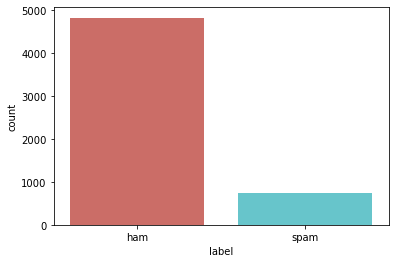

In [2]:
# Read SMS data base with pandas.
# Public set of SMS messages for mobile phone spam research.
# It is composed of 5574 tagged messages (spam or ham).
#url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
#sms = pd.read_table(url, header=None, names=['label', 'message'])
file='../../../../data/sms.tsv'
sms = pd.read_table(file, header=None, names=['label', 'message'])

# examine the first 10 rows
print(sms.head())

sns.countplot(x='label', data=sms, palette='hls')
plt.show()

In [3]:
# Convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# Create feature and label vectors.
x = sms.message

y = np.zeros((len(sms.label_num),1))
y[:,0] = sms.label_num

In [4]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [5]:
# Convert a collection of text documents into a matrix of token counts.
vect = CountVectorizer()
# Learn the vocabulary dictionary and return term-document matrix for the training set.
x_train_dtm = vect.fit_transform(x_train)
# Transform validation set into document-term matrix.
x_test_dtm = vect.transform(x_test)

In [6]:
# Instantiate Logistic classifier.
classifier = LogisticRegression()
# Train the model.
classifier.fit(x_train_dtm, y_train.ravel())

LogisticRegression()

In [7]:
y_pred_class = classifier.predict(x_test_dtm)

In [8]:
# Calculate accuracy of class predictions.
accuracy_score(y_test, y_pred_class)

0.9856424982053122

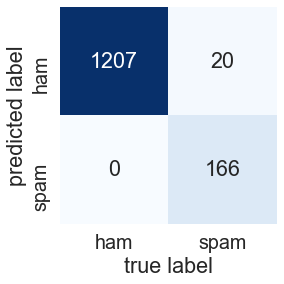

In [9]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix_spam_classification_logistic_regression.png", dpi=600)
plt.show()

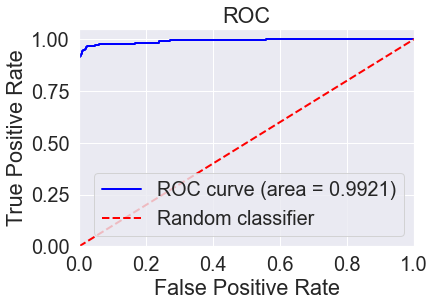

In [10]:
# Getting the probabilities for each class.
y_prob = classifier.predict_proba(x_test_dtm)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc)
)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [11]:
# Print classification report.
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1207
         1.0       1.00      0.89      0.94       186

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393

